In [75]:
# Libraries for data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preproccesing and standarization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pipeline 
from sklearn.pipeline import Pipeline

In [76]:
# The Pokemon dataset
poke_df = pd.read_csv('~/DevSpace/Data-Snippets/MachineLearning/datasets/Pokemon.csv')
poke_df.head()

,Type,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,False,45,49,49,65,65,45
1,Grass,False,60,62,63,80,80,60
2,Grass,False,80,82,83,100,100,80
3,Grass,False,80,100,123,122,120,80
4,Fire,False,39,52,43,60,50,65


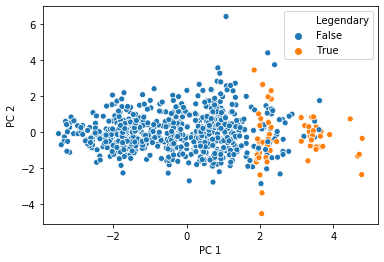

In [77]:
# Numeric Stats Only for PCA
poke_stats = poke_df.drop(['Type', 'Legendary'], axis=1)

# Build Processing Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_stats)

# Add the 2 components to poke_cat_df
poke_df['PC 1'] = pc[:, 0]
poke_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_df,  x='PC 1', y='PC 2', hue='Legendary')
plt.show()

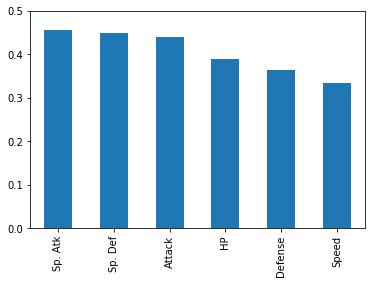

In [78]:
# Extract PC 1 from model
pca_vectors = pd.Series(data=pipe[1].components_[0], index=poke_stats.columns)

# Plot model component descomposition
pca_vectors.sort_values(ascending=False).plot(kind='bar', ylim=(0, 0.5))
plt.show()

# Pokemon with higher base stats overall are higher on PC 1 (Legendaries)

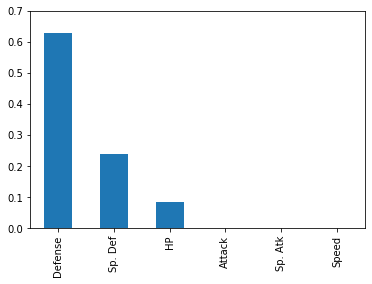

In [79]:
# Extract PC 2 from model
pca_vectors = pd.Series(data=pipe[1].components_[1], index=poke_stats.columns)

# Plot model component descomposition
pca_vectors.sort_values(ascending=False).plot(kind='bar', ylim=(0, 0.7))
plt.show()

# Pokemon with higher defensive stats score higher on PC2.